In [1]:
!pip3 install opencv-python
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
img = image.load_img("/Users/ussie/Desktop/Injam/injam/Train/Real/Image1.jpg")

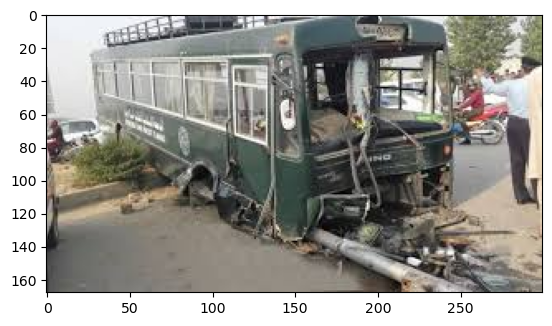

In [3]:
plt.imshow(img)

In [4]:
img = image.load_img("/Users/ussie/Desktop/Injam/injam/Train/Fake/Image1.jpg")

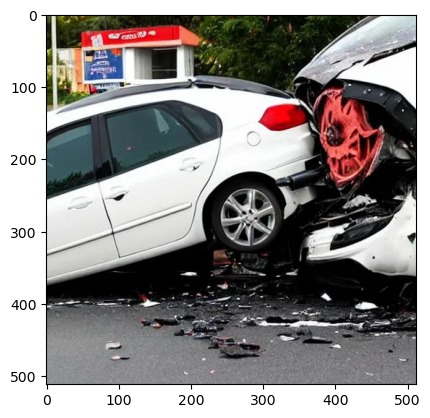

In [5]:
plt.imshow(img)

In [6]:
cv2.imread("/Users/ussie/Desktop/Injam/injam/Train/Real/Image1.jpg").shape

(168, 300, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory("/Users/ussie/Desktop/Injam/injam/Train/", target_size = (200,200), batch_size = 3, class_mode = "binary")
validation_dataset = train.flow_from_directory("/Users/ussie/Desktop/Injam/injam/Validation/", target_size = (200,200), batch_size = 3, class_mode = "binary")

Found 186 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Fake': 0, 'Real': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3))
                                    ,tf.keras.layers.MaxPool2D(2,2),
                                    # increasing number of chanels
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')

])

2023-08-03 22:01:21.627576: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-08-03 22:01:21.627608: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-03 22:01:21.627613: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-03 22:01:21.627699: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 22:01:21.627952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001), metrics=['accuracy'])


In [13]:
model_fit = model.fit(train_dataset, epochs=10, validation_data = validation_dataset)


Epoch 1/10


2023-08-03 22:01:28.142215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 3s 34ms/step - loss: 0.9385 - accuracy: 0.6613 - val_loss: 0.3914 - val_accuracy: 0.9167
Epoch 2/10
 3/62 [>.............................] - ETA: 1s - loss: 0.3670 - accuracy: 0.7778

2023-08-03 22:01:30.422992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 2s 30ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.1973 - val_accuracy: 0.9167
Epoch 3/10
62/62 [==============================] - 2s 30ms/step - loss: 0.4417 - accuracy: 0.8656 - val_loss: 0.7248 - val_accuracy: 0.6250
Epoch 4/10
62/62 [==============================] - 2s 29ms/step - loss: 0.1795 - accuracy: 0.9247 - val_loss: 0.0447 - val_accuracy: 0.9583
Epoch 5/10
62/62 [==============================] - 2s 30ms/step - loss: 0.2492 - accuracy: 0.9301 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 6/10
62/62 [==============================] - 2s 30ms/step - loss: 0.1997 - accuracy: 0.9516 - val_loss: 0.1469 - val_accuracy: 0.9167
Epoch 7/10
62/62 [==============================] - 2s 30ms/step - loss: 0.1000 - accuracy: 0.9677 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 8/10
62/62 [==============================] - 2s 29ms/step - loss: 0.0922 - accuracy: 0.9839 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 9/10
62/62 [======

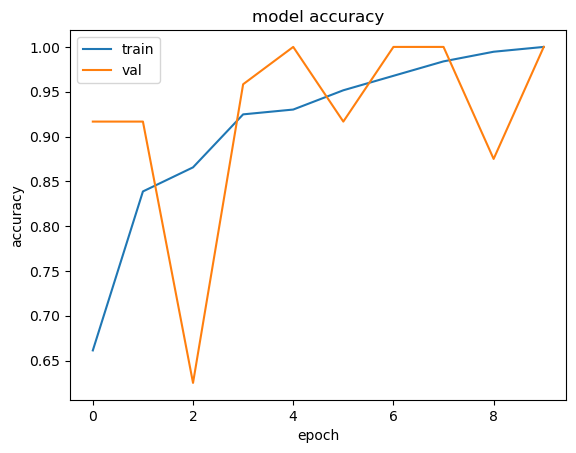

In [14]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

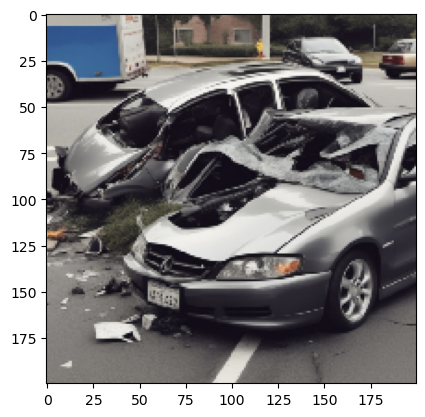

1/1 [==============================] - 0s 58ms/step
This image is Real


2023-08-03 22:01:57.039140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


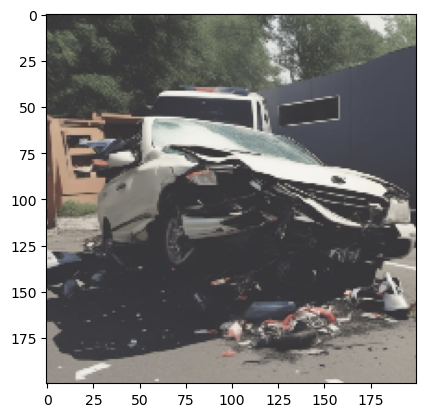

1/1 [==============================] - 0s 8ms/step
This image is Real


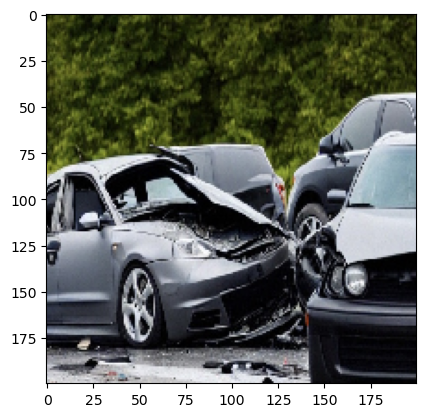

1/1 [==============================] - 0s 8ms/step
This image is Fake


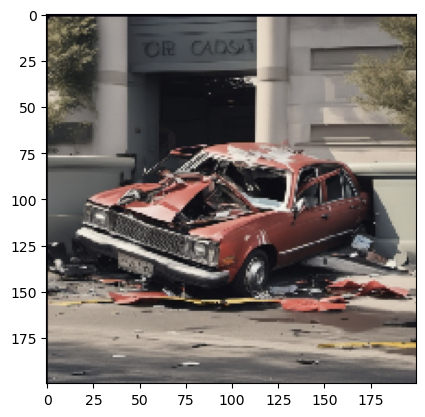

1/1 [==============================] - 0s 8ms/step
This image is Fake


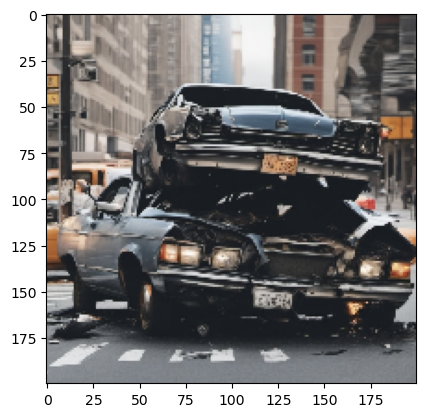

1/1 [==============================] - 0s 16ms/step
This image is Fake


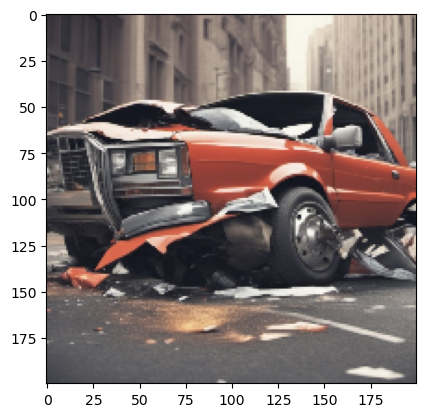

1/1 [==============================] - 0s 9ms/step
This image is Fake


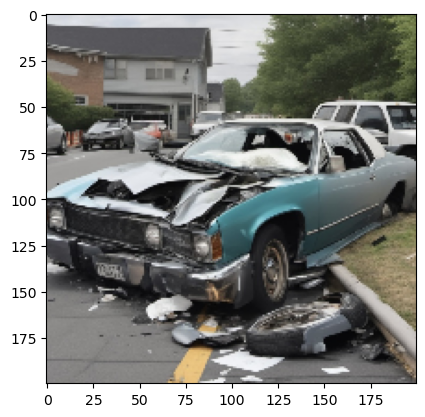

1/1 [==============================] - 0s 9ms/step
This image is Real


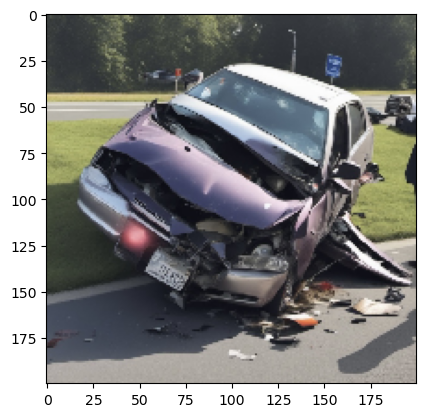

1/1 [==============================] - 0s 8ms/step
This image is Real


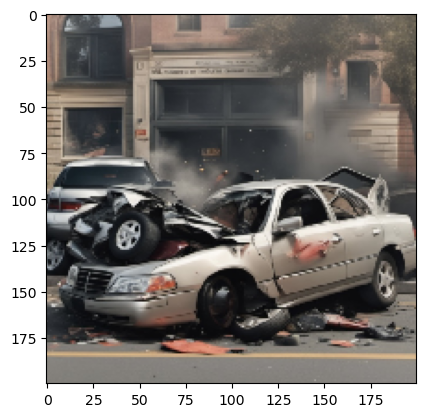

1/1 [==============================] - 0s 8ms/step
This image is Real


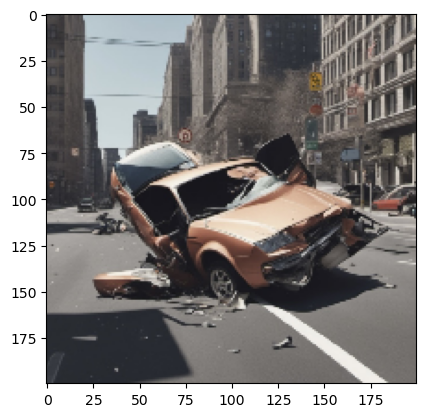

1/1 [==============================] - 0s 9ms/step
This image is Real


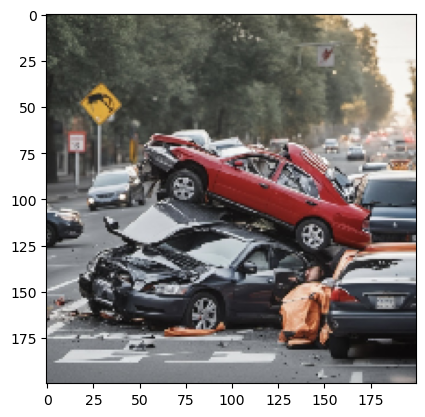

1/1 [==============================] - 0s 8ms/step
This image is Real


Accuracy is 36.36363636363637%


In [15]:
dir_path = "/Users/ussie/Desktop/Injam/injam/Test/Fake"
hashmap = {0:0, 1:0}
for i in os.listdir(dir_path):
    if i != ".DS_Store":
        img = image.load_img(dir_path+ '//'+i, target_size=(200,200))
        plt.imshow(img)
        plt.show()
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        images = np.vstack([X])
        val = model.predict(images)
        predict = np.round(val) 
        
        
        if predict == 0:
            hashmap[0] +=1 
            print("This image is Fake")
        elif predict == 1:
            print("This image is Real")
            hashmap[1] +=1
print("\n")

result = hashmap[0]/(hashmap[0]+hashmap[1])
print("Accuracy is {}%".format(result*100))
        
        

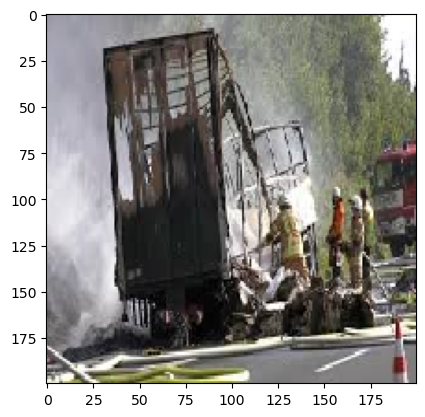

1/1 [==============================] - 0s 10ms/step
This image is Real


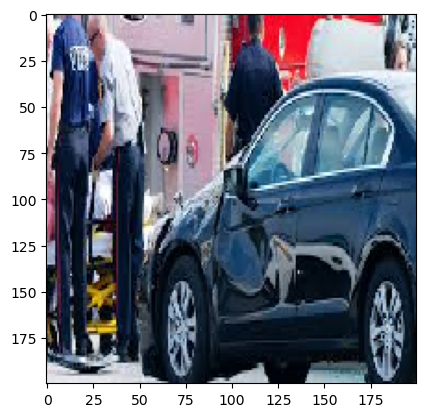

1/1 [==============================] - 0s 10ms/step
This image is Real


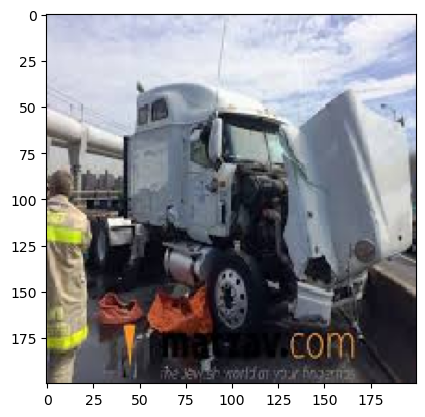

1/1 [==============================] - 0s 8ms/step
This image is Real


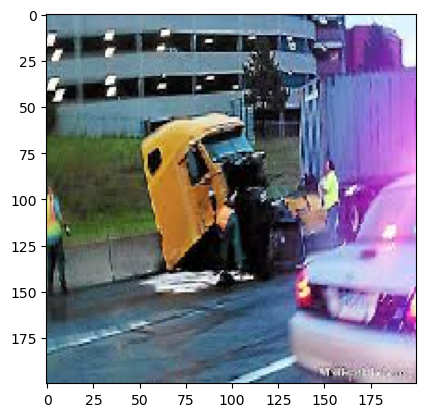

1/1 [==============================] - 0s 9ms/step
This image is Real


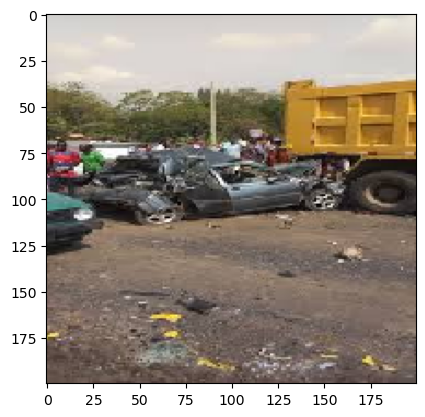

1/1 [==============================] - 0s 8ms/step
This image is Real


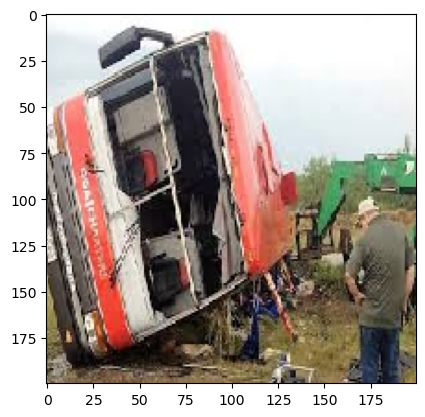

1/1 [==============================] - 0s 8ms/step
This image is Real


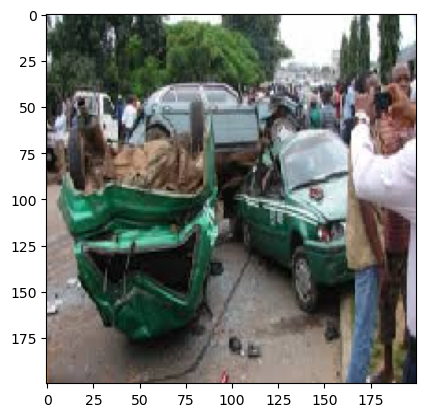

1/1 [==============================] - 0s 8ms/step
This image is Real


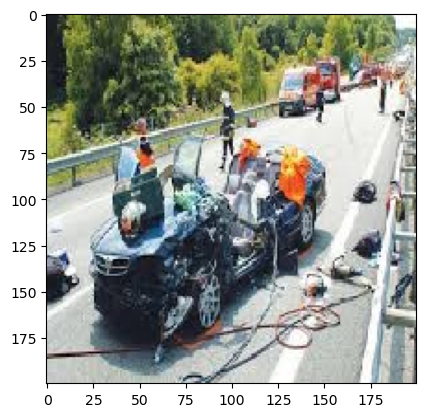

1/1 [==============================] - 0s 8ms/step
This image is Real


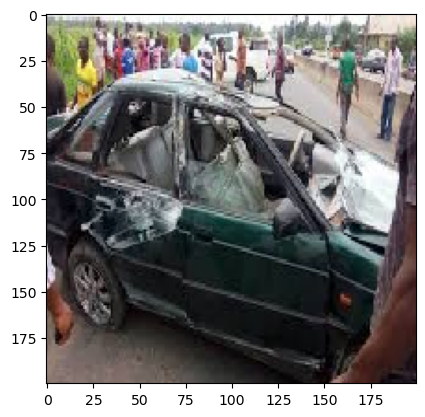

1/1 [==============================] - 0s 9ms/step
This image is Real


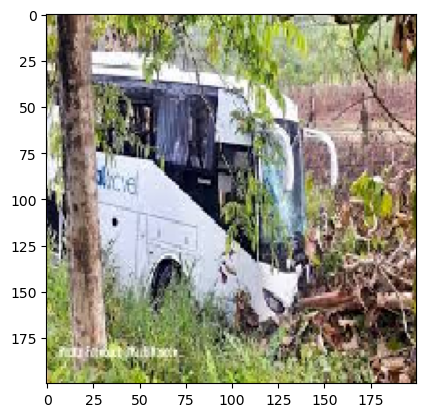

1/1 [==============================] - 0s 8ms/step
This image is Real


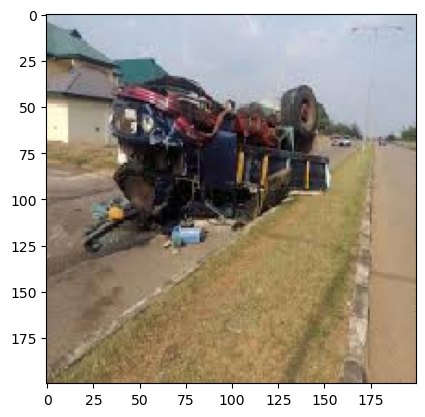

1/1 [==============================] - 0s 25ms/step
This image is Real


Accuracy is 100.0%


In [16]:
dir_path = "/Users/ussie/Desktop/Injam/injam/Test/Real"
hashmap = {0:0, 1:0}
for i in os.listdir(dir_path):
    if i != ".DS_Store":
        img = image.load_img(dir_path+ '//'+i, target_size=(200,200))
        plt.imshow(img)
        plt.show()
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        images = np.vstack([X])
        val = model.predict(images)
        predict = np.round(val) 
        if predict == 0:
            hashmap[0] +=1 
            print("This image is Fake")
        elif predict == 1:
            print("This image is Real")
            hashmap[1] +=1
print("\n")

result = hashmap[1]/(hashmap[0]+hashmap[1])
print("Accuracy is {}%".format(result*100))
